In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
f = open('D:\\Jupyter\\利用Python进行数据分析2\\yjx\\Python-\\chapter14\\data\\fec\\P00000001-ALL.csv')
fec = pd.read_csv(f)
fec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001731 entries, 0 to 1001730
Data columns (total 16 columns):
cmte_id              1001731 non-null object
cand_id              1001731 non-null object
cand_nm              1001731 non-null object
contbr_nm            1001731 non-null object
contbr_city          1001712 non-null object
contbr_st            1001727 non-null object
contbr_zip           1001620 non-null object
contbr_employer      988002 non-null object
contbr_occupation    993301 non-null object
contb_receipt_amt    1001731 non-null float64
contb_receipt_dt     1001731 non-null object
receipt_desc         14166 non-null object
memo_cd              92482 non-null object
memo_text            97770 non-null object
form_tp              1001731 non-null object
file_num             1001731 non-null int64
dtypes: float64(1), int64(1), object(14)
memory usage: 122.3+ MB


In [3]:
fec.iloc[123456]

cmte_id                             C00431445
cand_id                             P80003338
cand_nm                         Obama, Barack
contbr_nm                         ELLMAN, IRA
contbr_city                             TEMPE
contbr_st                                  AZ
contbr_zip                          852816719
contbr_employer      ARIZONA STATE UNIVERSITY
contbr_occupation                   PROFESSOR
contb_receipt_amt                          50
contb_receipt_dt                    01-DEC-11
receipt_desc                              NaN
memo_cd                                   NaN
memo_text                                 NaN
form_tp                                 SA17A
file_num                               772372
Name: 123456, dtype: object

In [4]:
unique_cands = fec.cand_nm.unique()
unique_cands

array(['Bachmann, Michelle', 'Romney, Mitt', 'Obama, Barack',
       "Roemer, Charles E. 'Buddy' III", 'Pawlenty, Timothy',
       'Johnson, Gary Earl', 'Paul, Ron', 'Santorum, Rick',
       'Cain, Herman', 'Gingrich, Newt', 'McCotter, Thaddeus G',
       'Huntsman, Jon', 'Perry, Rick'], dtype=object)

In [5]:
unique_cands[2]

'Obama, Barack'

In [6]:
parties = {'Bachmann, Michelle': 'Republican',
            'Cain, Herman': 'Republican',
            'Gingrich, Newt': 'Republican',
            'Huntsman, Jon': 'Republican',
            'Johnson, Gary Earl': 'Republican',
            'McCotter, Thaddeus G': 'Republican',
            'Obama, Barack': 'Democrat',
            'Paul, Ron': 'Republican',
            'Pawlenty, Timothy': 'Republican',
            'Perry, Rick': 'Republican',
            "Roemer, Charles E. 'Buddy' III": 'Republican',
            'Romney, Mitt': 'Republican',
            'Santorum, Rick': 'Republican'}
fec.cand_nm[123456:123461]

123456    Obama, Barack
123457    Obama, Barack
123458    Obama, Barack
123459    Obama, Barack
123460    Obama, Barack
Name: cand_nm, dtype: object

In [7]:
fec.cand_nm[123456:123461].map(parties)

123456    Democrat
123457    Democrat
123458    Democrat
123459    Democrat
123460    Democrat
Name: cand_nm, dtype: object

In [9]:
fec['party'] = fec.cand_nm.map(parties)
fec['party'].value_counts()

Democrat      593746
Republican    407985
Name: party, dtype: int64

In [10]:
(fec.contb_receipt_amt > 0).value_counts()

True     991475
False     10256
Name: contb_receipt_amt, dtype: int64

In [11]:
fec = fec[fec.contb_receipt_amt > 0]
fec_mrbo = fec[fec.cand_nm.isin(['Obama, Barack','Romney,Mitt'])]
fec.contbr_occupation.value_counts()[:10]

RETIRED                                   233990
INFORMATION REQUESTED                      35107
ATTORNEY                                   34286
HOMEMAKER                                  29931
PHYSICIAN                                  23432
INFORMATION REQUESTED PER BEST EFFORTS     21138
ENGINEER                                   14334
TEACHER                                    13990
CONSULTANT                                 13273
PROFESSOR                                  12555
Name: contbr_occupation, dtype: int64

In [12]:
occ_mapping = {
'INFORMATION REQUESTED PER BEST EFFORTS' : 'NOT PROVIDED','INFORMATION REQUESTED' : 'NOT PROVIDED',
'INFORMATION REQUESTED (BEST EFFORTS)' : 'NOT PROVIDED',
'C.E.O.': 'CEO'
}
f1 = lambda x:occ_mapping.get(x,x)
fec.contbr_occupation = fec.contbr_occupation.map(f1)

In [13]:
emp_mapping = {
'INFORMATION REQUESTED PER BEST EFFORTS' : 'NOT PROVIDED',
'INFORMATION REQUESTED' : 'NOT PROVIDED',
'SELF' : 'SELF-EMPLOYED',
'SELF EMPLOYED' : 'SELF-EMPLOYED',
}
f2 = lambda x:emp_mapping.get(x, x)
fec.contbr_employer = fec.contbr_employer.map(f2)

In [14]:
by_occupation = fec.pivot_table('contb_receipt_amt',index='contbr_occupation', columns='party',aggfunc='sum')
over_2mm = by_occupation[by_occupation.sum(1) > 2000000]
over_2mm

party,Democrat,Republican
contbr_occupation,,
ATTORNEY,11141982.97,7.477194e+06
CEO,2074974.79,4.211041e+06
CONSULTANT,2459912.71,2.544725e+06
ENGINEER,951525.55,1.818374e+06
EXECUTIVE,1355161.05,4.138850e+06
HOMEMAKER,4248875.80,1.363428e+07
INVESTOR,884133.00,2.431769e+06
LAWYER,3160478.87,3.912243e+05
MANAGER,762883.22,1.444532e+06


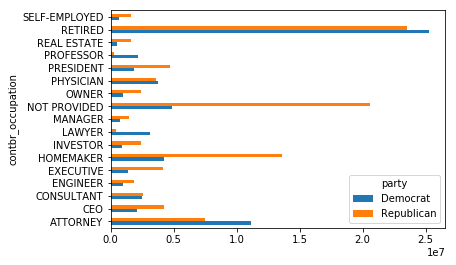

In [15]:
over_2mm.plot(kind='barh')

In [16]:
def get_top_amounts(group,key,n=5):
    totals = group.groupby(key)['contb_receipt_amt'].sum()
    return totals.nlargest(n)
grouped = fec_mrbo.groupby('cand_nm')
grouped.apply(get_top_amounts,'contbr_occupation',n=7)

contbr_occupation,RETIRED,ATTORNEY,INFORMATION REQUESTED,HOMEMAKER,PHYSICIAN,LAWYER,CONSULTANT
cand_nm,,,,,,,
"Obama, Barack",25305116.38,11141982.97,4866973.96,4248875.8,3735124.94,3160478.87,2459912.71


In [17]:
grouped.apply(get_top_amounts,'contbr_employer',n=10)

contbr_employer,RETIRED,SELF-EMPLOYED,NOT EMPLOYED,INFORMATION REQUESTED,HOMEMAKER,SELF,SELF EMPLOYED,STUDENT,VOLUNTEER,MICROSOFT
cand_nm,,,,,,,,,,
"Obama, Barack",22694358.85,17080985.96,8586308.7,5053480.37,2605408.54,1076531.2,469290.0,318831.45,257104.0,215585.36


### 对出资额分组

In [18]:
bins = np.array([0, 1, 10, 100, 1000, 10000,100000, 1000000, 10000000])
labels = pd.cut(fec_mrbo.contb_receipt_amt,bins)
labels

107640        (10, 100]
107641      (100, 1000]
107642      (100, 1000]
107643      (100, 1000]
107647        (10, 100]
107648      (100, 1000]
107649      (100, 1000]
107650    (1000, 10000]
107651    (1000, 10000]
107652      (100, 1000]
107653      (100, 1000]
107654    (1000, 10000]
107655      (100, 1000]
107656    (1000, 10000]
107657        (10, 100]
107658          (1, 10]
107659        (10, 100]
107660      (100, 1000]
107661          (1, 10]
107662          (1, 10]
107663          (1, 10]
107664      (100, 1000]
107665        (10, 100]
107666        (10, 100]
107667          (1, 10]
107668      (100, 1000]
107669          (1, 10]
107670          (1, 10]
107671        (10, 100]
107673        (10, 100]
              ...      
701356        (10, 100]
701357          (1, 10]
701358        (10, 100]
701359        (10, 100]
701360        (10, 100]
701361        (10, 100]
701362      (100, 1000]
701363        (10, 100]
701364        (10, 100]
701365        (10, 100]
701366        (1

In [19]:
grouped = fec_mrbo.groupby(['cand_nm',labels])
grouped.size().unstack(0)

cand_nm,"Obama, Barack"
contb_receipt_amt,
"(0, 1]",493
"(1, 10]",40070
"(10, 100]",372280
"(100, 1000]",153991
"(1000, 10000]",22284
"(10000, 100000]",2
"(100000, 1000000]",3
"(1000000, 10000000]",4


In [20]:
bucket_sums = grouped.contb_receipt_amt.sum().unstack(0)
normed_sums = bucket_sums.div(bucket_sums.sum(axis=1),axis=0)
normed_sums

cand_nm,"Obama, Barack"
contb_receipt_amt,
"(0, 1]",1.0
"(1, 10]",1.0
"(10, 100]",1.0
"(100, 1000]",1.0
"(1000, 10000]",1.0
"(10000, 100000]",1.0
"(100000, 1000000]",1.0
"(1000000, 10000000]",1.0


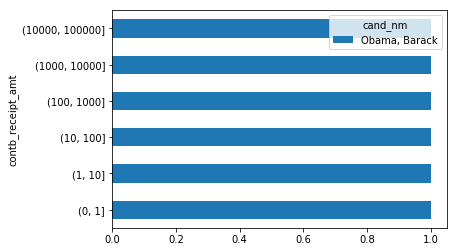

In [21]:
normed_sums[:-2].plot(kind='barh')

In [22]:
grouped = fec_mrbo.groupby(['cand_nm','contbr_st'])
totals = grouped.contb_receipt_amt.sum().unstack(0).fillna(0)
totals = totals[totals.sum(1) > 100000]
totals[:10]

cand_nm,"Obama, Barack"
contbr_st,
AK,281840.15
AL,543123.48
AR,359247.28
AZ,1506476.98
CA,23824984.24
CO,2132429.49
CT,2068291.26
DC,4373538.80
DE,336669.14


In [23]:
percent = totals.div(totals.sum(1),axis=0)
percent[:10]

cand_nm,"Obama, Barack"
contbr_st,
AK,1.0
AL,1.0
AR,1.0
AZ,1.0
CA,1.0
CO,1.0
CT,1.0
DC,1.0
DE,1.0
